# Deep Learning Classifier using Dropout Regularization

It's a little non-intuitive, but sometimes throwing neurons away during training produces better results!

That's because ignoring a random portion of neurons at each training step helps to prevent overfitting, and forces the neural network to spread out its learning.

Use scikit_learn's make_classification function to randomly create a clustering dataset with 1000 samples and 4 classes:

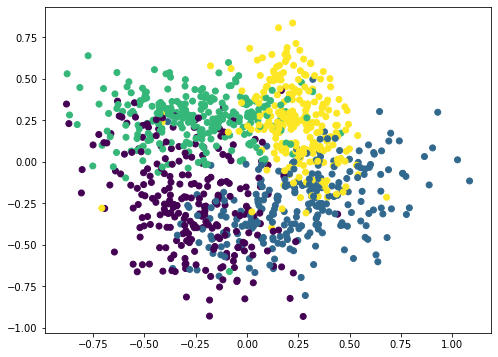

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.datasets import make_classification

x, y = make_classification(n_features=2, n_classes=4, n_samples=1000, n_redundant=0, n_informative=2,
                           random_state=47, n_clusters_per_class=1, scale=0.25)

from pylab import *

plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1], c=y.astype(np.float))
plt.show()

Use the to_categorical function to "one-hot encode" the label data, and then produce a random train-test-split of the resulting dataset:

In [8]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

y = keras.utils.to_categorical(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Set up a deep neural network without any dropout layers:

In [9]:
x_train.shape[1:]

(2,)

In [10]:
x_train.shape

(800, 2)

In [11]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=x_train.shape[1:]))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
          
print(model.summary())

history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=100,
                    verbose=2,
                    validation_data=(x_test, y_test))

scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                48        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 36        
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________
None
Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 - 0s - loss: 1.3721 - acc: 0.2475 - val_loss: 1.3489 - val_acc: 0.2650
Epoch 2/100
800/800 - 0s - loss: 1.3503 - acc: 0.2488 - val_loss: 1.3279 - val_acc: 0.2650
Epoch 3/100
800/800 - 0s - loss: 1.3292 - acc: 0.2575 - val_loss: 1.3082 - val_acc: 0.2800
Epoch 4/100
800/800 - 0s - loss: 1.3099 - acc: 0.2850 - val_lo

Epoch 82/100
800/800 - 0s - loss: 0.5876 - acc: 0.7650 - val_loss: 0.6452 - val_acc: 0.7450
Epoch 83/100
800/800 - 0s - loss: 0.5874 - acc: 0.7650 - val_loss: 0.6444 - val_acc: 0.7450
Epoch 84/100
800/800 - 0s - loss: 0.5870 - acc: 0.7625 - val_loss: 0.6442 - val_acc: 0.7400
Epoch 85/100
800/800 - 0s - loss: 0.5870 - acc: 0.7638 - val_loss: 0.6447 - val_acc: 0.7450
Epoch 86/100
800/800 - 0s - loss: 0.5863 - acc: 0.7650 - val_loss: 0.6442 - val_acc: 0.7450
Epoch 87/100
800/800 - 0s - loss: 0.5862 - acc: 0.7638 - val_loss: 0.6445 - val_acc: 0.7450
Epoch 88/100
800/800 - 0s - loss: 0.5858 - acc: 0.7663 - val_loss: 0.6434 - val_acc: 0.7400
Epoch 89/100
800/800 - 0s - loss: 0.5855 - acc: 0.7625 - val_loss: 0.6433 - val_acc: 0.7400
Epoch 90/100
800/800 - 0s - loss: 0.5851 - acc: 0.7638 - val_loss: 0.6440 - val_acc: 0.7450
Epoch 91/100
800/800 - 0s - loss: 0.5850 - acc: 0.7638 - val_loss: 0.6445 - val_acc: 0.7450
Epoch 92/100
800/800 - 0s - loss: 0.5848 - acc: 0.7625 - val_loss: 0.6440 - val_

Set up the same deep neural network, but with a 20% droput layer in between each hidden layer:

In [12]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=x_train.shape[1:]))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
          
print(model.summary())

history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=100,
                    verbose=2,
                    validation_data=(x_test, y_test))

scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                48        
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 36        
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________
None
Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 - 0s - loss: 1.3627 - acc: 0.1950 - val_loss: 1.352

Epoch 79/100
800/800 - 0s - loss: 0.7716 - acc: 0.6675 - val_loss: 0.6682 - val_acc: 0.7400
Epoch 80/100
800/800 - 0s - loss: 0.7244 - acc: 0.7050 - val_loss: 0.6673 - val_acc: 0.7450
Epoch 81/100
800/800 - 0s - loss: 0.7565 - acc: 0.6975 - val_loss: 0.6662 - val_acc: 0.7500
Epoch 82/100
800/800 - 0s - loss: 0.7524 - acc: 0.6913 - val_loss: 0.6662 - val_acc: 0.7500
Epoch 83/100
800/800 - 0s - loss: 0.7285 - acc: 0.7038 - val_loss: 0.6667 - val_acc: 0.7500
Epoch 84/100
800/800 - 0s - loss: 0.7239 - acc: 0.7113 - val_loss: 0.6665 - val_acc: 0.7400
Epoch 85/100
800/800 - 0s - loss: 0.7434 - acc: 0.7050 - val_loss: 0.6648 - val_acc: 0.7450
Epoch 86/100
800/800 - 0s - loss: 0.7184 - acc: 0.7088 - val_loss: 0.6627 - val_acc: 0.7450
Epoch 87/100
800/800 - 0s - loss: 0.7510 - acc: 0.6938 - val_loss: 0.6614 - val_acc: 0.7450
Epoch 88/100
800/800 - 0s - loss: 0.7273 - acc: 0.7000 - val_loss: 0.6599 - val_acc: 0.7550
Epoch 89/100
800/800 - 0s - loss: 0.7084 - acc: 0.7125 - val_loss: 0.6589 - val_